<a href="https://colab.research.google.com/github/arina19-2000/unimi/blob/main/ABSA/textsent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data upload

In [1]:
!pip install datasets

In [2]:
from datasets import load_dataset

ds = load_dataset("jordiclive/FABSA")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
print(ds)


DatasetDict({
    train: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 7930
    })
    validation: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1057
    })
    test: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1587
    })
})


In [4]:
import pandas as pd
import numpy as np

dff = pd.DataFrame(ds['train'])

In [5]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan..."
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp..."
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']


In [6]:
dff.shape

(7930, 7)

In [7]:
dff['data_source'].value_counts()

,count
data_source,
Google Play,4612
Apple Store,1870
Trustpilot,1448


In [8]:
dff['industry'].value_counts()

,count
industry,
Fashion,2161
Price Comparison,1157
Groceries,1021
Trading,1021
Travel Booking,973
Banking,913
Ride Hailing,383
Information Technology,141
Consulting,81


In [9]:
dff.head(5)

,id,org_index,data_source,industry,text,labels,label_codes
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan..."
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp..."
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']


Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# from spellchecker import SpellChecker

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
# spell = SpellChecker()
stop_words = set(stopwords.words('english'))

def clean(text):
    """
    removing URLs, HTML tags, special characters, and digits.
    """
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

def normalize(text):
    """
    converting text to lowercase.
    """
    return text.lower()

# def spelling(text):
#     """
#     fix typos, missplellings.
#     """
#     corrected_text = []
#     for word in text.split():
#         correction = spell.correction(word)
#         if correction is None:
#             corrected_text.append(word)  # Use the original word if no correction is found
#         else:
#             corrected_text.append(correction)  # Use the corrected word
#     return ' '.join(corrected_text)

def lemmatize(text):
    """
    lemmatize w/NLTK WordNetLemmatizer.
    """
    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize each word and remove stop words
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

    return lemmatized_text

def preprocess(text):
    """
    perform all.
    """
    text = clean(text)
    # text = spelling(text)
    text = normalize(text)
    text = lemmatize(text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Spelling corrections have distorted some words' meaning.

In [11]:
dff.loc[:, 'clean'] = dff['text'].apply(preprocess)



In [12]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan...",experience around parking forum review based s...
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp...",love handy plus hate bank take away alot business
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1'],sometimes take
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc...",worst app ordered sneaker week ago still haven...
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],easy load info


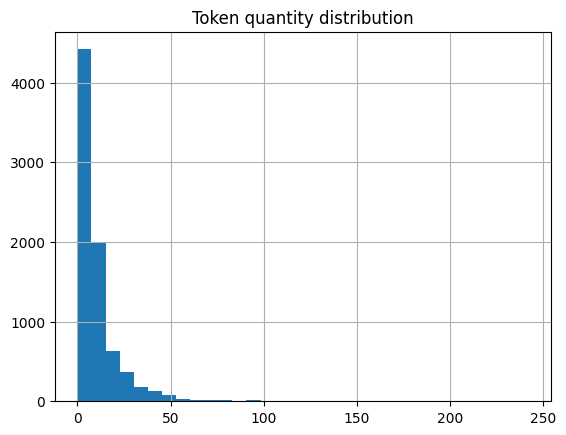

In [13]:
from matplotlib import pyplot as plt
dff["tokens"] = dff["clean"].apply(lambda x: len(x.split()))
dff["tokens"].hist(bins=32)
plt.title("Token quantity distribution");

In [14]:
def clean_label_codes(label_codes_series):
    unique_codes = set()

    for label_codes in label_codes_series:
        if isinstance(label_codes, str):
            label_codes = label_codes.replace("'", "").replace("[", "").replace("]", "").strip()
            codes = label_codes.split(',')
            for code in codes:
                code = code.strip()
                parts = code.rsplit('.', 1)
                if len(parts) == 2:
                    clean_code = parts[0]
                    unique_codes.add(clean_code)
                else:
                    print(f"Unexpected format: {code}")
        else:
            print(f"Unexpected data type: {label_codes}")

    return unique_codes

unique_labels = clean_label_codes(dff['label_codes'])

unique_labels_list = list(unique_labels)
print(unique_labels_list)
len(unique_labels_list)

['company-brand.competitor', 'staff-support.attitude-of-staff', 'value.price-value-for-money', 'staff-support.email', 'account-management.account-access', 'value.discounts-promotions', 'company-brand.general-satisfaction', 'online-experience.app-website', 'purchase-booking-experience.ease-of-use', 'logistics-rides.speed', 'company-brand.reviews', 'staff-support.phone']


12

In [18]:
def aspects(label_code):
    labels = label_code.split(',')
    first_elements = [label.split('.')[0].replace('-', ' ').replace('[', ' ').replace("'", ' ').strip() for label in labels]
    return first_elements

def unique_aspects(label_code):
    labels = label_code.split(',')
    first_elements = [label.split('.')[0].replace('-', ' ').replace('[', ' ').replace("'", ' ').strip() for label in labels]
    unique_elements = list(set(first_elements))
    return unique_elements

dff['aspects'] = dff['label_codes'].apply(aspects)

dff['unique_aspects'] = dff['label_codes'].apply(unique_aspects)

dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,aspects,unique_aspects
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan...",experience around parking forum review based s...,118,"[staff support, company brand, company brand]","[staff support, company brand]"
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp...",love handy plus hate bank take away alot business,9,"[company brand, company brand]",[company brand]
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1'],sometimes take,2,[company brand],[company brand]
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc...",worst app ordered sneaker week ago still haven...,17,"[logistics rides, online experience, company b...","[logistics rides, online experience, company b..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],easy load info,3,[company brand],[company brand]


In [19]:
import ast
dff.loc[:,'label_codes'] = dff['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def split_label_sentiment(label_code):
    if '.' in label_code:
        label, sentiment = label_code.rsplit('.', 1)
        return label.replace("-", " "), sentiment  # Replace '-' with space for label
    return label_code, None

def extract_sentiments(label_codes):
    label_sentiments = [split_label_sentiment(label) for label in label_codes]  # Process each label
    sentiments = [int(sentiment) if sentiment in ['-1', '0', '1'] else None for _, sentiment in label_sentiments]  # Extract and convert sentiments
    return sentiments

dff['sentiments'] = dff['label_codes'].apply(lambda x: extract_sentiments(x))

In [20]:
dff[['label_codes', 'aspects','sentiments']].head()


,label_codes,aspects,sentiments
0,"[staff-support.attitude-of-staff.-1, company-b...","[staff support, company brand, company brand]","[-1, -1, -1]"
1,"[company-brand.general-satisfaction.1, company...","[company brand, company brand]","[1, 1]"
2,[company-brand.general-satisfaction.-1],[company brand],[-1]
3,"[logistics-rides.speed.-1, online-experience.a...","[logistics rides, online experience, company b...","[-1, -1, -1]"
4,[company-brand.general-satisfaction.1],[company brand],[1]


In [21]:
def assign_positive(sentiments):
    sentiment_sum = sum(sentiments)
    return 1 if sentiment_sum >= 0 else 0

dff['positive'] = dff['sentiments'].apply(assign_positive)
dff[['label_codes', 'sentiments', 'positive']].head(15)


,label_codes,sentiments,positive
0,"[staff-support.attitude-of-staff.-1, company-b...","[-1, -1, -1]",0
1,"[company-brand.general-satisfaction.1, company...","[1, 1]",1
2,[company-brand.general-satisfaction.-1],[-1],0
3,"[logistics-rides.speed.-1, online-experience.a...","[-1, -1, -1]",0
4,[company-brand.general-satisfaction.1],[1],1
5,"[company-brand.reviews.-1, online-experience.a...","[-1, -1]",0
6,"[purchase-booking-experience.ease-of-use.1, on...","[1, 1, 1]",1
7,[company-brand.general-satisfaction.1],[1],1
8,"[staff-support.attitude-of-staff.1, purchase-b...","[1, 1, 1]",1
9,[online-experience.app-website.1],[1],1


In [22]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,aspects,unique_aspects,sentiments,positive
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","[staff-support.attitude-of-staff.-1, company-b...",experience around parking forum review based s...,118,"[staff support, company brand, company brand]","[staff support, company brand]","[-1, -1, -1]",0
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","[company-brand.general-satisfaction.1, company...",love handy plus hate bank take away alot business,9,"[company brand, company brand]",[company brand],"[1, 1]",1
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",[company-brand.general-satisfaction.-1],sometimes take,2,[company brand],[company brand],[-1],0
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","[logistics-rides.speed.-1, online-experience.a...",worst app ordered sneaker week ago still haven...,17,"[logistics rides, online experience, company b...","[logistics rides, online experience, company b...","[-1, -1, -1]",0
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],easy load info,3,[company brand],[company brand],[1],1


In [23]:
dff['positive'].value_counts()

,count
positive,
1,5744
0,2186


In [38]:
dummies = pd.get_dummies(dff['unique_aspects'].explode()).groupby(level=0).sum()

dffin = pd.concat([dff, dummies], axis=1)
dffin.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,aspects,unique_aspects,sentiments,positive,account management,company brand,logistics rides,online experience,purchase booking experience,staff support,value
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","[staff-support.attitude-of-staff.-1, company-b...",experience around parking forum review based s...,118,"[staff support, company brand, company brand]","[staff support, company brand]","[-1, -1, -1]",0,0,1,0,0,0,1,0
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","[company-brand.general-satisfaction.1, company...",love handy plus hate bank take away alot business,9,"[company brand, company brand]",[company brand],"[1, 1]",1,0,1,0,0,0,0,0
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",[company-brand.general-satisfaction.-1],sometimes take,2,[company brand],[company brand],[-1],0,0,1,0,0,0,0,0
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","[logistics-rides.speed.-1, online-experience.a...",worst app ordered sneaker week ago still haven...,17,"[logistics rides, online experience, company b...","[logistics rides, online experience, company b...","[-1, -1, -1]",0,0,1,1,1,0,0,0
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],easy load info,3,[company brand],[company brand],[1],1,0,1,0,0,0,0,0


In [39]:
dffin.shape

(7930, 20)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(dffin["clean"])

In [41]:
print(X_train)

  (0, 5467)	0.07382215915911289
  (0, 6613)	0.08847805817601374
  (0, 7509)	0.06572963587565972
  (0, 5287)	0.0625660410638438
  (0, 1930)	0.09387850483952884
  (0, 3885)	0.09816508050915038
  (0, 571)	0.05619116862969087
  (0, 7118)	0.07686353299794178
  (0, 6748)	0.07618123198379911
  (0, 248)	0.048328429430508864
  (0, 676)	0.09816508050915038
  (0, 486)	0.07686353299794178
  (0, 5498)	0.09083713100069996
  (0, 899)	0.09816508050915038
  (0, 160)	0.08847805817601374
  (0, 3206)	0.0481871534339761
  (0, 5130)	0.08655055533107844
  (0, 3028)	0.04809400748855607
  (0, 256)	0.09816508050915038
  (0, 5121)	0.06953558348949136
  (0, 6467)	0.07493603015300648
  (0, 5153)	0.08115010866756331
  (0, 3226)	0.07234459640526779
  (0, 2445)	0.053325789283049055
  (0, 2106)	0.09816508050915038
  :	:
  (7924, 3934)	0.22974266575449392
  (7924, 3031)	0.20897511246546385
  (7924, 2058)	0.1321476349765099
  (7924, 2670)	0.2358738053576437
  (7925, 2308)	0.412746545649335
  (7925, 2962)	0.4557919720291

In [43]:
# exploded_df['sentiment'] = exploded_df['sentiment'].replace('-1', -1)
# exploded_df['sentiment'] = exploded_df['sentiment'].replace('1', 1)
# exploded_df['sentiment'] = exploded_df['sentiment'].replace('0', 0)


y_train = dffin['positive'].values

In [ ]:
print(y_train)

class

In [54]:
import ast
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

class DataProcessor:
    def __init__(self, df):
        self.df = df

    # Text cleaning function: remove URLs, HTML tags, special characters, and digits
    def clean(self, text):
        text = re.sub(r'http\S+', '', text)        # Remove URLs
        text = re.sub(r'<.*?>', '', text)          # Remove HTML tags
        text = re.sub(r'[^a-zA-Z\s]', '', text)    # Remove special characters and digits
        return text

    # Text normalization function: convert text to lowercase
    def normalize(self, text):
        return text.lower()

    # Lemmatize text using NLTK WordNetLemmatizer
    def lemmatize(self, text):
        words = word_tokenize(text)
        lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
        return lemmatized_text

    # Full text preprocessing pipeline
    def preprocess_text(self, text):
        text = self.clean(text)
        text = self.normalize(text)
        text = self.lemmatize(text)
        return text

    # Apply text preprocessing to the 'text' column
    def preprocess_text_column(self):
        self.df['clean'] = self.df['text'].apply(self.preprocess_text)

    # Method to process aspects by extracting the first part of each label
    def aspects(self, label_codes):
        first_elements = [label.split('.')[0].replace('-', ' ').strip() for label in label_codes]
        return first_elements

    # Method to find unique aspects
    def unique_aspects(self, label_codes):
        first_elements = [label.split('.')[0].replace('-', ' ').strip() for label in label_codes]
        unique_elements = list(set(first_elements))
        return unique_elements

    # Method to process label codes (convert string representation of list to an actual list)
    def process_label_codes(self):
        self.df.loc[:, 'label_codes'] = self.df['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Method to split label and sentiment
    def split_label_sentiment(self, label_code):
        if '.' in label_code:
            label, sentiment = label_code.rsplit('.', 1)
            return label.replace("-", " "), sentiment  # Replace '-' with space for label
        return label_code, None

    # Method to extract sentiments from label_codes
    def extract_sentiments(self, label_codes):
        label_sentiments = [self.split_label_sentiment(label) for label in label_codes]  # Process each label
        sentiments = [int(sentiment) if sentiment in ['-1', '0', '1'] else None for _, sentiment in label_sentiments]  # Extract and convert sentiments
        return sentiments

    # Method to assign a 'positive' column based on sentiments sum
    def assign_positive(self, sentiments):
        sentiment_sum = sum([s for s in sentiments if s is not None])  # Ignore None values
        return 1 if sentiment_sum >= 0 else 0

    # Method to create aspects and unique_aspects columns
    def create_aspect_columns(self):
        self.df['aspects'] = self.df['label_codes'].apply(self.aspects)
        self.df['unique_aspects'] = self.df['label_codes'].apply(self.unique_aspects)

    # Method to create sentiments and positive columns
    def create_sentiment_columns(self):
        self.df['sentiments'] = self.df['label_codes'].apply(lambda x: self.extract_sentiments(x))
        self.df['positive'] = self.df['sentiments'].apply(self.assign_positive)

    # Method to create dummy variables from unique_aspects
    def create_dummy_variables(self):
        dummies = pd.get_dummies(self.df['unique_aspects'].explode()).groupby(level=0).sum()
        self.df = pd.concat([self.df, dummies], axis=1)

    # Method to process the entire dataframe and generate necessary columns
    def process(self):
        # Preprocess the text data first
        self.preprocess_text_column()

        # Apply label code processing and extraction of sentiments and aspects
        self.process_label_codes()
        self.create_aspect_columns()
        self.create_sentiment_columns()
        self.create_dummy_variables()

        return self.df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
processor = DataProcessor(dft)
dftest = processor.process()

# Display the final dataframe
dftest.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,aspects,unique_aspects,sentiments,positive,account management,company brand,logistics rides,online experience,purchase booking experience,staff support,value
0,301982094,514,Google Play,Banking,Very useful and easy.,"[[Purchase booking experience: Ease of use, po...",[purchase-booking-experience.ease-of-use.1],useful easy,[purchase booking experience],[purchase booking experience],[1],1,0,0,0,0,1,0,0
1,301981085,369,Google Play,Ride Hailing,easy to use.gud response from customer care se...,"[[Staff support: Attitude of staff, positive],...","[staff-support.attitude-of-staff.1, online-exp...",easy usegud response customer care section pea...,"[staff support, online experience, purchase bo...","[staff support, online experience, purchase bo...","[1, -1, 1, -1]",1,0,0,0,1,1,1,1
2,301986508,685,Google Play,Trading,money 😁,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],money,[company brand],[company brand],[1],1,0,1,0,0,0,0,0
3,301981875,514,Google Play,Banking,Great facility,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],great facility,[company brand],[company brand],[1],1,0,1,0,0,0,0,0
4,301977341,411,Apple Store,Groceries,"Love doing my ORG411 shop with the app, never ...","[[Purchase booking experience: Ease of use, po...","[purchase-booking-experience.ease-of-use.1, on...",love org shop app never issue,"[purchase booking experience, online experience]","[online experience, purchase booking experience]","[1, 1]",1,0,0,0,1,1,0,0


## **Test data:**

In [61]:
dft = pd.DataFrame(ds['test'])

In [63]:
X_test = tfidf_vectorizer.transform(dftest["clean"])


In [65]:
y_test = dftest['positive'].values

## **Predict**

In [66]:
!pip install bornrule
from bornrule import BornClassifier
from sklearn.metrics import classification_report, f1_score,ConfusionMatrixDisplay,confusion_matrix

In [67]:
born_benchmark = BornClassifier(a=1, b=0, h=0)
born_benchmark.fit(X_train, y_train)
y_pred_bm = born_benchmark.predict(X_test)
print(classification_report(y_test, y_pred_bm, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.42      0.55       449
           1       0.81      0.96      0.88      1138

    accuracy                           0.81      1587
   macro avg       0.81      0.69      0.72      1587
weighted avg       0.81      0.81      0.79      1587



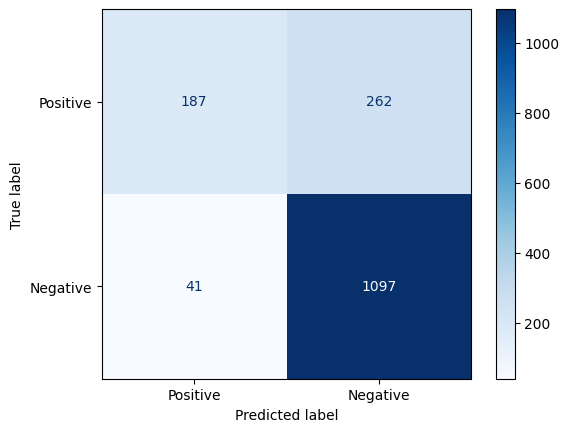

In [69]:
cm = confusion_matrix(y_test, y_pred_bm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive','Negative'])
disp.plot(cmap='Blues', values_format='d')


In [70]:
bc = BornClassifier(a=0.5, b=1, h=1)
bc.fit(X_train, y_train)
y_pred_bc = bc.predict(X_test)
print(classification_report(y_test, y_pred_bc, zero_division=0))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       449
           1       0.92      0.92      0.92      1138

    accuracy                           0.89      1587
   macro avg       0.86      0.86      0.86      1587
weighted avg       0.89      0.89      0.89      1587



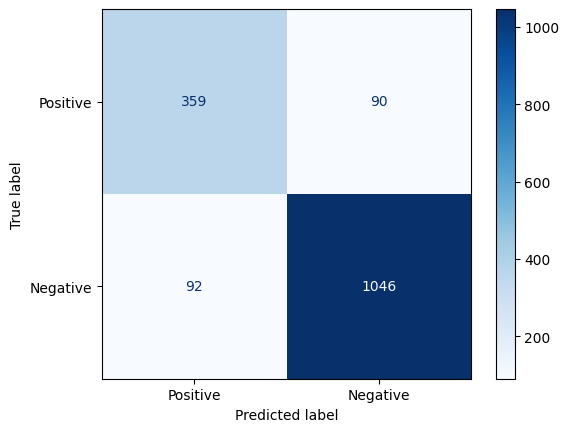

In [71]:
cm = confusion_matrix(y_test, y_pred_bc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive','Negative'])
disp.plot(cmap='Blues', values_format='d')


In [72]:
bc = BornClassifier(a=0.1, b=0.8, h=1)
bc.fit(X_train, y_train)
y_pred_ex = bc.predict(X_test)
print(classification_report(y_test, y_pred_ex, zero_division=0))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       449
           1       0.91      0.89      0.90      1138

    accuracy                           0.86      1587
   macro avg       0.82      0.83      0.83      1587
weighted avg       0.86      0.86      0.86      1587



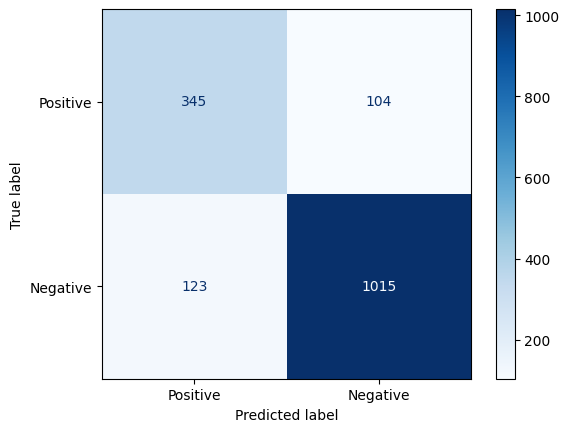

In [73]:
cm = confusion_matrix(y_test, y_pred_ex)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive','Negative'])
disp.plot(cmap='Blues', values_format='d')


In [ ]:
# Best parameters found:  {'a': 0.1, 'b': 1.0, 'h': 0.01}

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# param_grid = {
#     'a': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Values between 0 and 10
#     'b': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Same for 'b'
#     'h': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]   # And for 'h'
# }

# # Create the BornClassifier instance
# bc = BornClassifier()

# # Use GridSearchCV to find the best combination of hyperparameters
# grid_search = GridSearchCV(bc, param_grid, scoring='f1_macro', cv=5)  # Adjust 'scoring' as needed
# grid_search.fit(X_train, y_train)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Get the best model and make predictions on the test set
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)

# # Evaluate performance of the model
# print(classification_report(y_test, y_pred_best, zero_division=0))


## Explaining features

In [74]:
explanation = bc.explain()
print(explanation)

  (0, 1)	0.44088287936360177
  (1, 0)	0.16952999426224133
  (1, 1)	0.20631653667151575
  (2, 1)	0.49178671294016313
  (3, 1)	0.4780698692552168
  (4, 1)	0.4081323546600091
  (5, 1)	0.4462991986188752
  (6, 1)	0.4817695354873287
  (7, 0)	0.00041399227508178696
  (7, 1)	0.00041683442631023016
  (8, 1)	0.39047991463304094
  (9, 1)	0.45429216594267186
  (10, 0)	0.015818930001651278
  (10, 1)	0.01521602281533185
  (11, 1)	0.4807085937443271
  (12, 1)	0.45527623591168453
  (13, 0)	0.20002580791444063
  (13, 1)	0.2414442666710927
  (14, 0)	0.4818406128809645
  (15, 0)	0.46720514019861104
  (16, 0)	0.4547677248835839
  (17, 1)	0.4223993452901339
  (18, 0)	0.0020372494495913504
  (18, 1)	0.0020066733760135368
  (19, 0)	0.05841299281077606
  :	:
  (7509, 0)	0.0010478140706263238
  (7509, 1)	0.0010369048849557957
  (7510, 0)	0.412006792337664
  (7511, 0)	0.41909142108318215
  (7512, 1)	0.40299581585353444
  (7513, 0)	0.00038998309463969966
  (7513, 1)	0.00038722070966083766
  (7514, 0)	0.01261521

In [76]:
from scipy.sparse import csr_matrix

explanation_df = pd.DataFrame(csr_matrix(explanation).todense(), columns=["Negative", "Positive"])
tokens = tfidf_vectorizer.get_feature_names_out()
explanation_df["Tokens"] = tokens
explanation_df.head()

,Negative,Positive,Tokens
0,0.00000,0.440883,aa
1,0.16953,0.206317,aaa
2,0.00000,0.491787,aap
3,0.00000,0.478070,aaron
4,0.00000,0.408132,abbi


In [77]:
# Find top tokens for each sentiment class
top_negatives = explanation_df.sort_values(by="Negative", ascending=False).head(10)
top_positives = explanation_df.sort_values(by="Positive", ascending=False).head(10)

print("Top Negative Tokens:")
print(top_negatives[["Tokens", "Negative"]])

print("\nTop Positive Tokens:")
print(top_positives[["Tokens", "Positive"]])

Top Negative Tokens:
        Tokens  Negative
6622  terrible  0.623860
3111  horrible  0.591344
5915    server  0.564666
5210      race  0.562478
5702   rubbish  0.560055
7430     worse  0.557691
963   canceled  0.555226
370    appears  0.553889
2748   garbage  0.552387
4777      peso  0.552383

Top Positive Tokens:
         Tokens  Positive
2058       easy  0.718144
548     awesome  0.629673
844   brilliant  0.618682
2450       fast  0.618338
3890       love  0.614873
2877      great  0.610509
2959      handy  0.609318
660    beginner  0.604439
2443  fantastic  0.601174
2307  excellent  0.594549


In [78]:
# SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Logreg
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(max_iter=300,  multi_class='multinomial')

log_reg_classifier.fit(X_train, y_train)

y_pred_log_reg = log_reg_classifier.predict(X_test)
print(classification_report(y_test, y_pred_log_reg, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       449
           1       0.92      0.94      0.93      1138

    accuracy                           0.90      1587
   macro avg       0.88      0.87      0.88      1587
weighted avg       0.90      0.90      0.90      1587

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       449
           1       0.91      0.96      0.93      1138

    accuracy                           0.90      1587
   macro avg       0.89      0.86      0.87      1587
weighted avg       0.90      0.90      0.90      1587



##**Try Ngrams**

In [80]:
vectorizer2 = TfidfVectorizer(ngram_range=(1, 3))
X_train2 = vectorizer2.fit_transform(dffin["clean"])
X_test2 = vectorizer2.transform(dftest["clean"])


In [81]:
bc2 = BornClassifier(a=0.5, b=1, h=1)
bc2.fit(X_train2, y_train)
y_pred_bc2 = bc2.predict(X_test2)
print(classification_report(y_test, y_pred_bc2, zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       449
           1       0.91      0.94      0.92      1138

    accuracy                           0.89      1587
   macro avg       0.87      0.85      0.86      1587
weighted avg       0.89      0.89      0.89      1587



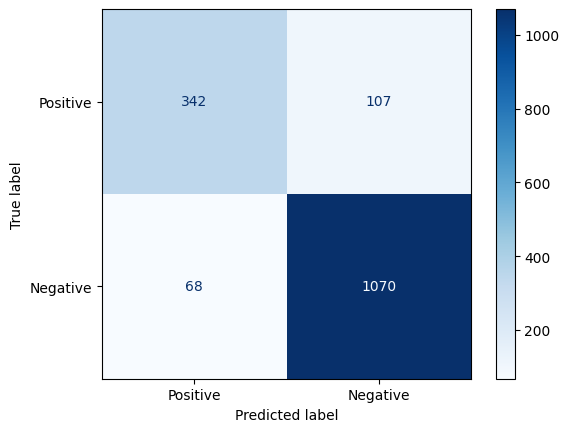

In [83]:
cm = confusion_matrix(y_test, y_pred_bc2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot(cmap='Blues', values_format='d')

## Aspect definition

In [ ]:
y_train_a = exploded_df["label1"].apply(preprocess)
y_train_a = tfidf_vectorizer.fit_transform(exploded_df["label1"])

In [ ]:
print(y_train_a)

In [ ]:
y_test_a = exploded_test["label1"].apply(preprocess)
y_test_a = tfidf_vectorizer.transform(exploded_test["label1"])

In [ ]:
print(y_test_a)

In [ ]:
bca = BornClassifier()
bca.fit(X_train, y_train_a)
y_pred_bca = bca.predict(X_test)
print(classification_report(y_test_a, y_pred_bca, zero_division=0))

In [ ]:
print(type(y_test_a), type(y_pred_bca))
print(y_test_a[:10])  # Print a few values to inspect
print(y_pred_bca[:10])

In [ ]:
# import pandas as pd
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk import pos_tag
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# # Define function to preprocess and filter text
# def filter_nouns(tokens):
#     # Perform POS tagging
#     tagged_tokens = pos_tag(tokens)

#     # Keep only nouns and verbs
#     filtered_tokens = [word for word, tag in tagged_tokens if tag.startswith('N')]

#     return ' '.join(filtered_tokens)  # Join back into a single string

# # Apply preprocessing to each row in 'clean' column
# def process_clean_column(text):
#     if isinstance(text, str):
#         tokens = word_tokenize(text.lower())
#         filtered_text = filter_nouns(tokens)
#     elif isinstance(text, list):
#         filtered_text = filter_nouns(text)
#     else:
#         filtered_text = ''

#     return filtered_text

# # Create 'clean2' column
# dff['clean2'] = dff['clean'].apply(process_clean_column)


In [ ]:
# import string
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # Preprocessing step (if the 'clean2' column contains raw text)
# if isinstance(dff['clean2'].iloc[0], str):
#     # If the 'clean2' column contains raw text, tokenize
#     def preprocess(text):
#         tokens = word_tokenize(text.lower())
#         tokens = [word for word in tokens if word.isalpha()]  # Keep only alphabetic tokens
#         return tokens

#     # Apply preprocessing to each text in 'clean2' column
#     tokenized_texts = dff['clean2'].apply(preprocess).tolist()
# else:
#     # Assume 'clean2' is already a list of tokens
#     tokenized_texts = dff['clean2'].tolist()

# # Join tokenized texts back into string format for CountVectorizer
# texts_for_vectorizer = [' '.join(tokens) for tokens in tokenized_texts]

# # Use CountVectorizer to create the document-term matrix
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# doc_term_matrix = vectorizer.fit_transform(texts_for_vectorizer)

# # Train LDA model
# num_topics = 10  # Number of topics you want to extract
# lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
# lda.fit(doc_term_matrix)

# # Get the top words for each topic
# num_words = 5  # Number of top words per topic
# words = vectorizer.get_feature_names_out()

# # Display the top words for each topic
# for topic_idx, topic in enumerate(lda.components_):
#     print(f"Topic {topic_idx}:")
#     print(" ".join([words[i] for i in topic.argsort()[:-num_words - 1:-1]]))


## Associate sentences to aspects


In [ ]:
# from nltk.tokenize import sent_tokenize

# sentences = sent_tokenize(text)

In [ ]:
# aspect_sentences = []
# for sentence in sentences:
#     for token in pricing_aspects:
#         if token in sentence.lower():
#             aspect_sentences.append((sentence, 'XXXXXXXXXX'))
#             break

In [ ]:
# sentence_vectors = tfidf_vectorizer.transform(aspect_sentences)
# aspect_sentiments = bc.predict(sentence_vectors)
# for aspect, sentiment in zip(aspect_sentences, aspect_sentiments):
#     print(f"Aspect: {aspect[1]} | Sentence: {aspect[0]} | Sentiment: {sentiment}")

In [ ]:
# Pipeline example

# # Step 3: Create a TF-IDF vectorizer and SVM pipeline
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('svm', OneVsRestClassifier(SVC(kernel='linear', probability=True)))
# ])

# # Step 4: Train the model
# pipeline.fit(X_train, y_train)

# # Step 5: Make predictions
# y_pred = pipeline.predict(X_test)

# # Step 6: Evaluate the model
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Optional: Hyperparameter tuning can be added here using GridSearchCV
